In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statistics import stdev, mean
%matplotlib inline

# Config

In [2]:
def report_string_to_dict(report):
    report_dict = {}
    metrics = report.split('\n')[0].split()
    for row in report.split('\n')[1:]:
        splitted = row.split()
        if len(splitted) > 4:
            class_name_size = len(splitted[0:-4])
            class_name = " ".join(splitted[0:-4])
            report_dict[class_name] = {}
            for metric_index in range(len(metrics)):
                metric = metrics[metric_index]
                metric_val = splitted[metric_index + class_name_size]
                report_dict[class_name][metric] = metric_val
        elif len(splitted) > 0:
            metric = splitted[0]
            report_dict[metric] = {}
            report_dict[metric][metrics[-2]] = splitted[1]
            report_dict[metric][metrics[-1]] = splitted[2]
    return report_dict

In [3]:
def csv_to_dataframe(csv_name, csv_folder = ""):
    if len(csv_folder) == 0:
        return pd.read_csv(csv_name + ".csv")
    else:
        return pd.read_csv(csv_folder + "/" + csv_name + ".csv")

# Metrics

In [4]:
def get_metrics_avg(csv_name, dataset_name, model_name, folder_name = "", strategy = "", filter_dataset = True):
    df = csv_to_dataframe(csv_name, folder_name)
    
    if filter_dataset:
        df = df.loc[df['dataset'] == dataset_name]
    if len(strategy) > 0:
        df = df.loc[df['phase_strategy'] == strategy]
    if len(model_name) > 0:
        df = df.loc[df['model'] == model_name]
        
    reports_string = df['report'].tolist()
    reports = []
    for report in reports_string:
        reports.append(report_string_to_dict(report))

    accuracy = []
    f1_score = []
    f1_score_weighted = []
    precision = []
    recall = []

    for report in reports:
        accuracy.append(float(report['accuracy']['f1-score']))
        precision.append(float(report['macro avg']['precision']))
        recall.append(float(report['macro avg']['recall']))
        f1_score.append(float(report['macro avg']['f1-score']))
        f1_score_weighted.append(float(report['weighted avg']['f1-score']))

    accuracy_dev = round(stdev(accuracy), 3)
    precision_dev = round(stdev(precision), 3)
    recall_dev = round(stdev(recall), 3)
    f1_score_dev = round(stdev(accuracy), 3)
    f1_score_weighted_dev = round(stdev(accuracy), 3)

    accuracy_avg = round(mean(accuracy), 3)
    precision_avg = round(mean(precision), 3)
    recall_avg = round(mean(recall), 3)
    f1_score_avg = round(mean(f1_score), 3)
    f1_score_weighted_avg = round(mean(f1_score_weighted), 3)

    result = {
        'accuracy': {
            'avg' : accuracy_avg,
            'dev' : accuracy_dev
        },
        'f1_score': {
            'avg' : f1_score_avg,
            'dev' : f1_score_dev
        },
        'precision':{
            'avg' : precision_avg,
            'dev' : precision_dev
        },
        'recall':{
            'avg' : recall_avg,
            'dev' : recall_dev
        },
        'f1_score_weighted': {
            'avg' : f1_score_weighted_avg,
            'dev' : f1_score_weighted_dev
        },
    }

    return result

## Results

### Caesarian

In [5]:
get_metrics_avg('experiments_caesarian', 'caesarian.arff', 'sf', folder_name='results', filter_dataset=False)

{'accuracy': {'avg': 0.499, 'dev': 0.094},
 'precision': {'avg': 0.457, 'dev': 0.23},
 'recall': {'avg': 0.539, 'dev': 0.087},
 'f1_score': {'avg': 0.438, 'dev': 0.094},
 'f1_score_weighted': {'avg': 0.421, 'dev': 0.094}}

In [6]:
get_metrics_avg('experiments_caesarian', 'caesarian.arff', 'hsgs', folder_name='results', filter_dataset=False)

{'accuracy': {'avg': 0.496, 'dev': 0.071},
 'precision': {'avg': 0.431, 'dev': 0.228},
 'recall': {'avg': 0.541, 'dev': 0.06},
 'f1_score': {'avg': 0.414, 'dev': 0.071},
 'f1_score_weighted': {'avg': 0.394, 'dev': 0.071}}

In [7]:
get_metrics_avg('experiments_caesarian', 'caesarian.arff', 'phase-encoding', folder_name='results', filter_dataset=False, strategy="original")

{'accuracy': {'avg': 0.466, 'dev': 0.073},
 'precision': {'avg': 0.322, 'dev': 0.191},
 'recall': {'avg': 0.512, 'dev': 0.051},
 'f1_score': {'avg': 0.356, 'dev': 0.073},
 'f1_score_weighted': {'avg': 0.334, 'dev': 0.073}}

In [8]:
get_metrics_avg('experiments_caesarian', 'caesarian.arff', 'phase-encoding', folder_name='results', filter_dataset=False, strategy="angle")

{'accuracy': {'avg': 0.477, 'dev': 0.072},
 'precision': {'avg': 0.337, 'dev': 0.212},
 'recall': {'avg': 0.529, 'dev': 0.055},
 'f1_score': {'avg': 0.366, 'dev': 0.072},
 'f1_score_weighted': {'avg': 0.341, 'dev': 0.072}}

In [9]:
get_metrics_avg('experiments_caesarian', 'caesarian.arff', 'phase-encoding', folder_name='results', filter_dataset=False, strategy="radius")

{'accuracy': {'avg': 0.47, 'dev': 0.093},
 'precision': {'avg': 0.309, 'dev': 0.182},
 'recall': {'avg': 0.516, 'dev': 0.087},
 'f1_score': {'avg': 0.363, 'dev': 0.093},
 'f1_score_weighted': {'avg': 0.34, 'dev': 0.093}}

In [10]:
get_metrics_avg('experiments_caesarian', 'caesarian.arff', 'phase-encoding', folder_name='results', filter_dataset=False, strategy="angleradius")

{'accuracy': {'avg': 0.42, 'dev': 0.06},
 'precision': {'avg': 0.274, 'dev': 0.139},
 'recall': {'avg': 0.471, 'dev': 0.074},
 'f1_score': {'avg': 0.311, 'dev': 0.06},
 'f1_score_weighted': {'avg': 0.285, 'dev': 0.06}}

In [11]:
get_metrics_avg('classic_models_results', 'caesarian.arff', 'mlp', folder_name='results')

{'accuracy': {'avg': 0.571, 'dev': 0.069},
 'precision': {'avg': 0.37, 'dev': 0.181},
 'recall': {'avg': 0.538, 'dev': 0.083},
 'f1_score': {'avg': 0.425, 'dev': 0.069},
 'f1_score_weighted': {'avg': 0.449, 'dev': 0.069}}

In [12]:
get_metrics_avg('classic_models_results', 'caesarian.arff', 'perceptron', folder_name='results')

{'accuracy': {'avg': 0.535, 'dev': 0.065},
 'precision': {'avg': 0.367, 'dev': 0.197},
 'recall': {'avg': 0.53, 'dev': 0.059},
 'f1_score': {'avg': 0.393, 'dev': 0.065},
 'f1_score_weighted': {'avg': 0.402, 'dev': 0.065}}

### Breast Tissue

### 1 Neurônio

In [13]:
get_metrics_avg('experiments_breast_tissue_1_neuronio', 'breast_tissue_data.csv', 'sf', folder_name='results', filter_dataset=False)

{'accuracy': {'avg': 0.26, 'dev': 0.02},
 'precision': {'avg': 0.292, 'dev': 0.029},
 'recall': {'avg': 0.25, 'dev': 0.02},
 'f1_score': {'avg': 0.235, 'dev': 0.02},
 'f1_score_weighted': {'avg': 0.24, 'dev': 0.02}}

In [14]:
get_metrics_avg('experiments_breast_tissue_1_neuronio', 'breast_tissue_data.csv', 'hsgs', folder_name='results', filter_dataset=False)

{'accuracy': {'avg': 0.206, 'dev': 0.035},
 'precision': {'avg': 0.191, 'dev': 0.143},
 'recall': {'avg': 0.2, 'dev': 0.03},
 'f1_score': {'avg': 0.15, 'dev': 0.035},
 'f1_score_weighted': {'avg': 0.151, 'dev': 0.035}}

In [15]:
get_metrics_avg('experiments_breast_tissue_1_neuronio', 'breast_tissue_data.csv', 'phase-encoding', folder_name='results', filter_dataset=False, strategy="original")

{'accuracy': {'avg': 0.17, 'dev': 0.052},
 'precision': {'avg': 0.035, 'dev': 0.023},
 'recall': {'avg': 0.174, 'dev': 0.057},
 'f1_score': {'avg': 0.058, 'dev': 0.052},
 'f1_score_weighted': {'avg': 0.061, 'dev': 0.052}}

In [16]:
get_metrics_avg('experiments_breast_tissue_1_neuronio', 'breast_tissue_data.csv', 'phase-encoding', folder_name='results', filter_dataset=False, strategy="angle")

{'accuracy': {'avg': 0.164, 'dev': 0.033},
 'precision': {'avg': 0.03, 'dev': 0.005},
 'recall': {'avg': 0.161, 'dev': 0.025},
 'f1_score': {'avg': 0.05, 'dev': 0.033},
 'f1_score_weighted': {'avg': 0.055, 'dev': 0.033}}

In [17]:
get_metrics_avg('experiments_breast_tissue_1_neuronio', 'breast_tissue_data.csv', 'phase-encoding', folder_name='results', filter_dataset=False, strategy="radius")

{'accuracy': {'avg': 0.155, 'dev': 0.041},
 'precision': {'avg': 0.039, 'dev': 0.019},
 'recall': {'avg': 0.161, 'dev': 0.042},
 'f1_score': {'avg': 0.064, 'dev': 0.041},
 'f1_score_weighted': {'avg': 0.061, 'dev': 0.041}}

In [18]:
get_metrics_avg('experiments_breast_tissue_1_neuronio', 'breast_tissue_data.csv', 'phase-encoding', folder_name='results', filter_dataset=False, strategy="angleradius")

{'accuracy': {'avg': 0.188, 'dev': 0.057},
 'precision': {'avg': 0.051, 'dev': 0.036},
 'recall': {'avg': 0.191, 'dev': 0.062},
 'f1_score': {'avg': 0.077, 'dev': 0.057},
 'f1_score_weighted': {'avg': 0.076, 'dev': 0.057}}

In [19]:
get_metrics_avg('classic_models_results', 'breast_tissue_data.csv', 'mlp', folder_name='results')

{'accuracy': {'avg': 0.321, 'dev': 0.13},
 'precision': {'avg': 0.177, 'dev': 0.146},
 'recall': {'avg': 0.297, 'dev': 0.127},
 'f1_score': {'avg': 0.187, 'dev': 0.13},
 'f1_score_weighted': {'avg': 0.209, 'dev': 0.13}}

In [20]:
get_metrics_avg('classic_models_results', 'breast_tissue_data.csv', 'perceptron', folder_name='results')

{'accuracy': {'avg': 0.318, 'dev': 0.097},
 'precision': {'avg': 0.178, 'dev': 0.179},
 'recall': {'avg': 0.273, 'dev': 0.112},
 'f1_score': {'avg': 0.17, 'dev': 0.097},
 'f1_score_weighted': {'avg': 0.203, 'dev': 0.097}}

### Múltiplos Neurônios

In [21]:
get_metrics_avg('experiments_breast_tissue_multi_neuronios', 'breast_tissue_data.csv', model_name = "sf", folder_name='results', filter_dataset=False)

{'accuracy': {'avg': 0.23, 'dev': 0.0},
 'precision': {'avg': 0.04, 'dev': 0.0},
 'recall': {'avg': 0.17, 'dev': 0.0},
 'f1_score': {'avg': 0.06, 'dev': 0.0},
 'f1_score_weighted': {'avg': 0.08, 'dev': 0.0}}

In [22]:
get_metrics_avg('experiments_breast_tissue_multi_neuronios', 'breast_tissue_data.csv', model_name = "hsgs", folder_name='results', filter_dataset=False)

{'accuracy': {'avg': 0.23, 'dev': 0.0},
 'precision': {'avg': 0.04, 'dev': 0.0},
 'recall': {'avg': 0.17, 'dev': 0.0},
 'f1_score': {'avg': 0.06, 'dev': 0.0},
 'f1_score_weighted': {'avg': 0.08, 'dev': 0.0}}

In [23]:
get_metrics_avg('experiments_breast_tissue_multi_neuronios', 'breast_tissue_data.csv', model_name = "phase-encoding", folder_name='results', filter_dataset=False)

{'accuracy': {'avg': 0.14, 'dev': 0.0},
 'precision': {'avg': 0.02, 'dev': 0.0},
 'recall': {'avg': 0.17, 'dev': 0.0},
 'f1_score': {'avg': 0.04, 'dev': 0.0},
 'f1_score_weighted': {'avg': 0.03, 'dev': 0.0}}

# RoC Curve

In [24]:
def get_tp_and_fp_ratio_from_csv(csv_name, folder_name, index):
    df = csv_to_dataframe(csv_name, folder_name)

    matrix_str = df.iloc[index]['matrix']
    matrix_str = matrix_str.replace("[", "")
    matrix_str = matrix_str.replace("]", "")

    matrix = []
    for line in matrix_str.split('\n'):
        matrix.append([])
        for element in line.strip().split():
            matrix[-1].append(int(element))
    tp_ratio = round(matrix[1][1]/(matrix[1][1] + matrix[1][0]), 3)
    fp_ratio = round(matrix[0][1]/(matrix[1][1] + matrix[1][0]), 3)
    return tp_ratio, fp_ratio

In [25]:
def plot_roc(ratios_and_labels, filename = ""):
    plt.title('Receiver Operating Characteristic')
    color_index = 0
    colors = ['b*', 'rx', 'go', 'kx', 'y+']
    for ratio_and_label in ratios_and_labels:
        plt.plot(ratio_and_label[1], ratio_and_label[0], colors[color_index], label=ratio_and_label[2])
        color_index += 1
    plt.legend(loc='upper right')
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    if len(filename) > 0:
        plt.savefig(filename)

## Caesarian

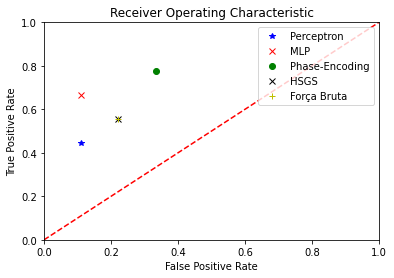

In [26]:
tp_perceptron, fp_perceptron = get_tp_and_fp_ratio_from_csv('classic_models_results', 'results', 6)
tp_mlp, fp_mlp = get_tp_and_fp_ratio_from_csv('classic_models_results', 'results', 21)
tp_phase, fp_phase = get_tp_and_fp_ratio_from_csv('experiments_caesarian', 'results', 65)
tp_hsgs, fp_hsgs = get_tp_and_fp_ratio_from_csv('experiments_caesarian', 'results', 16)
tp_sf, fp_sf = get_tp_and_fp_ratio_from_csv('experiments_caesarian', 'results', 4)

plot_roc([[tp_perceptron, fp_perceptron, 'Perceptron'],
           [tp_mlp, fp_mlp, 'MLP'],
           [tp_phase, fp_phase, 'Phase-Encoding'],
           [tp_hsgs, fp_hsgs, 'HSGS'],
           [tp_sf, fp_sf, 'Força Bruta']], "results/caesarian_roc.png")